In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Getting the dataset from other folder
df = pd.read_csv(r'C:\Users\Asdar\Desktop\My_Phyton\Dataset\Online Business Sales 2017-2019\business.retailsales.csv')
print(df.shape)
df.head()

(1775, 6)


,Product Type,Net Quantity,Gross Sales,Discounts,Returns,Total Net Sales
0,Art & Sculpture,34,14935.0,-594.00,-1609.0,12732.00
1,Basket,13,3744.0,-316.80,0.0,3427.20
2,Basket,12,3825.0,-201.60,-288.0,3335.40
3,Basket,17,3035.0,-63.25,0.0,2971.75
4,Art & Sculpture,47,2696.8,-44.16,0.0,2652.64


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1775 entries, 0 to 1774
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Product Type     1767 non-null   object 
 1   Net Quantity     1775 non-null   int64  
 2   Gross Sales      1775 non-null   float64
 3   Discounts        1775 non-null   float64
 4   Returns          1775 non-null   float64
 5   Total Net Sales  1775 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 76.3+ KB


In [4]:
# checking any null value
df.isnull().sum()

Product Type       8
Net Quantity       0
Gross Sales        0
Discounts          0
Returns            0
Total Net Sales    0
dtype: int64

In [5]:
# showing null value
df[df['Product Type'].isnull()]

,Product Type,Net Quantity,Gross Sales,Discounts,Returns,Total Net Sales
550,NaN,1,158.0,0.0,0.0,158.0
703,NaN,1,128.0,0.0,0.0,128.0
1028,NaN,1,75.0,0.0,0.0,75.0
1030,NaN,1,75.0,0.0,0.0,75.0
1287,NaN,1,48.0,0.0,0.0,48.0
1370,NaN,1,42.0,0.0,0.0,42.0
1618,NaN,1,24.0,0.0,0.0,24.0
1761,NaN,1,10.5,0.0,0.0,10.5


In [6]:
# changing null value to unknown
df = df.fillna('Unknown')

In [7]:
# change the type of data into string
df['Product Type']=df['Product Type'].astype(str)

# Investigate all the elements whithin each Feature 
for column in df:
    unique_vals = np.unique(df[column])
    nr_values = len(unique_vals)
    if nr_values < 10:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature Product Type :19
The number of values for feature Net Quantity :42
The number of values for feature Gross Sales :388
The number of values for feature Discounts :295
The number of values for feature Returns :62
The number of values for feature Total Net Sales :729


In [8]:
df.describe()

,Net Quantity,Gross Sales,Discounts,Returns,Total Net Sales
count,1775.000000,1775.000000,1775.000000,1775.000000,1775.000000
mean,3.712676,199.671746,-6.317623,-5.385437,187.968687
std,6.243078,464.880638,20.903517,46.654269,414.547039
min,-1.000000,0.000000,-594.000000,-1609.000000,-106.250000
25%,1.000000,48.000000,-6.000000,0.000000,44.800000
50%,2.000000,100.000000,0.000000,0.000000,96.000000
75%,4.000000,185.500000,0.000000,0.000000,184.750000
max,96.000000,14935.000000,0.000000,0.000000,12732.000000


In [9]:
# Removing negative sign
df['Discounts'] = df['Discounts'].abs()
df['Returns'] = df['Returns'].abs()

In [10]:
df

,Product Type,Net Quantity,Gross Sales,Discounts,Returns,Total Net Sales
0,Art & Sculpture,34,14935.0,594.00,1609.00,12732.00
1,Basket,13,3744.0,316.80,0.00,3427.20
2,Basket,12,3825.0,201.60,288.00,3335.40
3,Basket,17,3035.0,63.25,0.00,2971.75
4,Art & Sculpture,47,2696.8,44.16,0.00,2652.64
...,...,...,...,...,...,...
1770,Kitchen,0,28.0,2.81,25.19,0.00
1771,Jewelry,0,28.0,0.00,28.00,0.00
1772,Basket,0,116.0,23.20,92.80,0.00
1773,Kitchen,0,16.5,0.00,16.50,0.00


In [18]:
sns.set(rc={'figure.figsize':(12,10)})

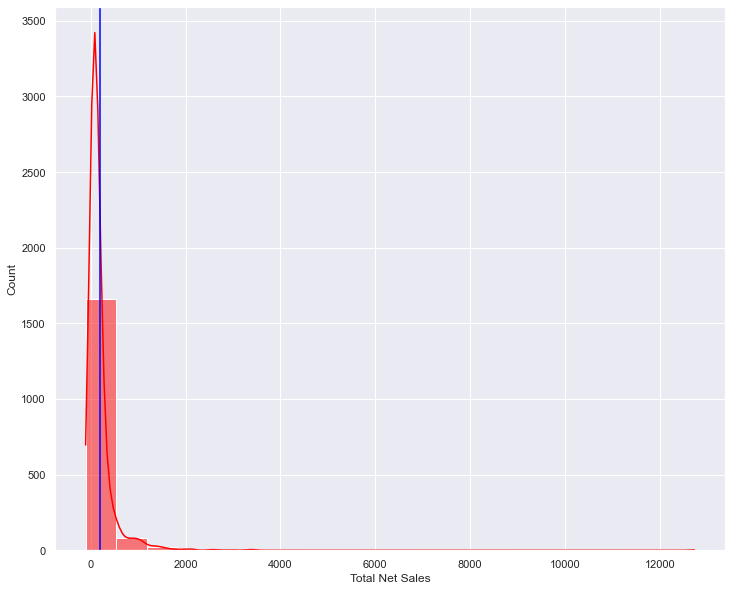

In [44]:
# Investigating the distribution of Total Net Sales
sns.histplot(data=df, x="Total Net Sales", kde=True, color = 'red', bins=20) #log_scale=True

# Calculating the mean
mean = df["Total Net Sales"].mean()
plt.axvline(mean, 0,1, color = 'blue')

In [20]:
aggregation_functions = {'Net Quantity': 'sum', 'Gross Sales': 'sum', 'Discounts': 'sum', 'Returns': 'sum', 'Total Net Sales': 'sum'}
df_new = df.groupby(df['Product Type']).aggregate(aggregation_functions).reset_index()
df_new = df_new.rename(columns={'Product Type': 'Product_Type'})
df_new

,Product_Type,Net Quantity,Gross Sales,Discounts,Returns,Total Net Sales
0,Accessories,84,3892.40,107.02,0.00,3785.38
1,Art & Sculpture,1427,90316.60,2955.82,2879.93,84480.85
2,Basket,1461,143815.50,4584.42,4439.69,134791.39
3,Christmas,575,15476.00,345.19,670.00,14460.81
4,Easter,1,38.00,3.80,0.00,34.20
5,Fair Trade Gifts,110,2258.00,53.33,0.00,2204.67
6,Furniture,27,2034.00,169.04,0.00,1864.96
7,Gift Baskets,1,19.50,0.00,0.00,19.50
8,Home Decor,404,27114.55,991.21,423.35,25699.99
9,Jewelry,991,31048.00,965.85,509.20,29572.95


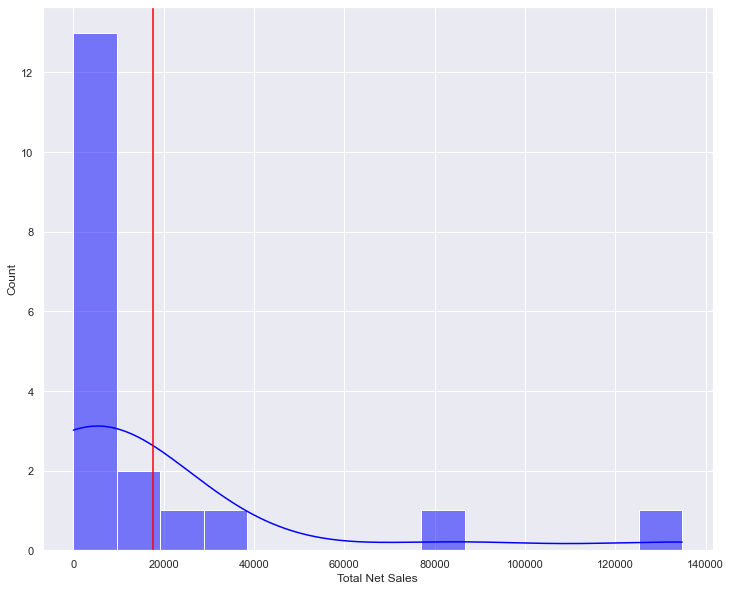

In [46]:
# Investigating the distribution of Total Net Sales by products
sns.histplot(data=df_new, x="Total Net Sales", kde=True, color = 'blue') #log_scale=True

# Calculating the mean
mean = df_new["Total Net Sales"].mean()
plt.axvline(mean, 0,1, color = 'red')

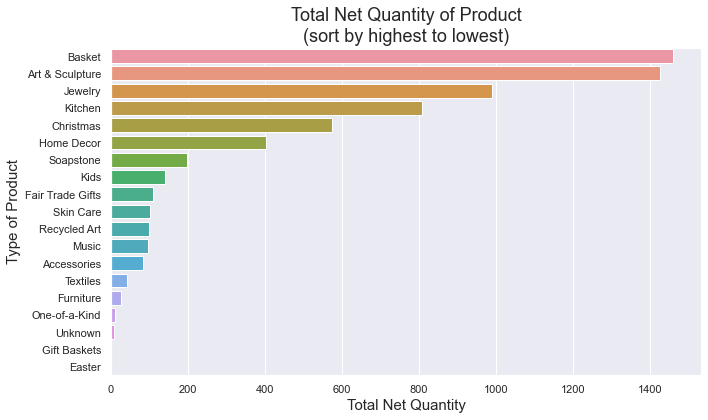

In [21]:
plt.figure(figsize=(10,6))
ax = sns.barplot(y = "Product_Type" , 
                 x = "Net Quantity", 
                 data=df_new, ci=False, 
                 order=df_new.sort_values("Net Quantity", ascending = False).Product_Type)
plt.ylabel("Type of Product", size=15)
plt.xlabel("Total Net Quantity", size=15)
plt.title("Total Net Quantity of Product\n(sort by highest to lowest)", size=18)
plt.tight_layout()

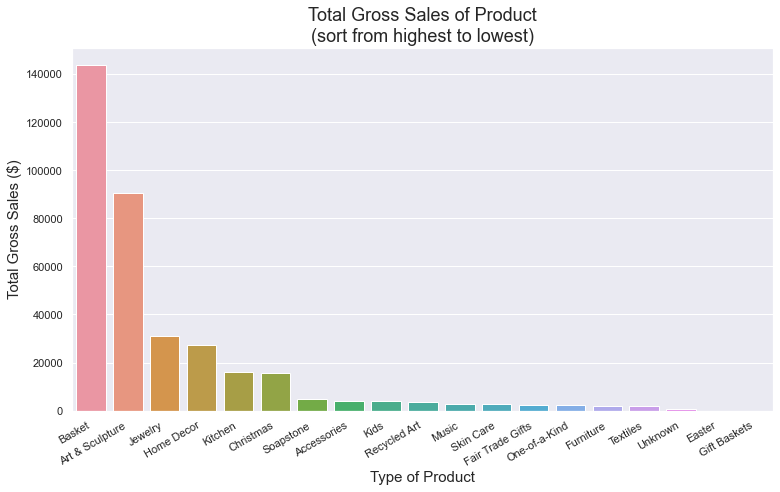

In [22]:
plt.figure(figsize=(11,7))
ax = sns.barplot(x = "Product_Type" , 
                 y = "Gross Sales", 
                 data=df_new, ci=False, 
                 order=df_new.sort_values("Gross Sales", ascending = False).Product_Type)
plt.xlabel("Type of Product", size=15)
plt.ylabel("Total Gross Sales ($)", size=15)
plt.title("Total Gross Sales of Product\n(sort from highest to lowest)", size=18)
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.tight_layout()

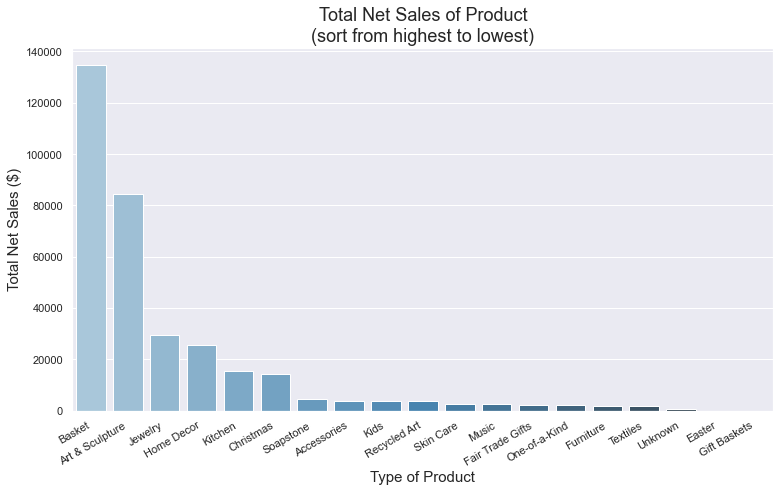

In [23]:
plt.figure(figsize=(11,7))
ax = sns.barplot(x = "Product_Type" , 
                 y = "Total Net Sales", 
                 data=df_new, ci=False,
                 palette="Blues_d",
                 order=df_new.sort_values("Total Net Sales", ascending = False).Product_Type)
plt.xlabel("Type of Product", size=15)
plt.ylabel("Total Net Sales ($)", size=15)
plt.title("Total Net Sales of Product\n(sort from highest to lowest)", size=18)
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.tight_layout()

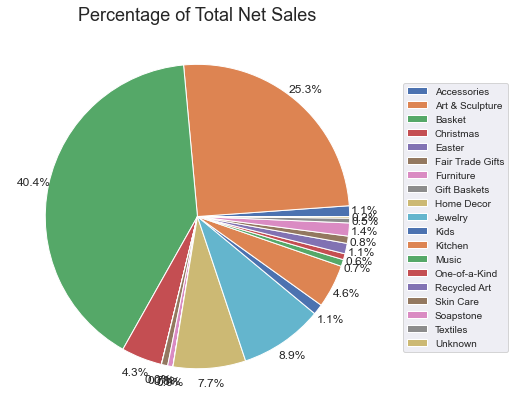

In [24]:
plt.subplots(figsize=(9, 7))
pie = plt.pie(df_new['Total Net Sales'], autopct='%1.1f%%', pctdistance=1.1)
plt.legend(pie[0], df_new['Product_Type'], bbox_to_anchor=(1,0.5), loc="center right",
          fontsize=10, bbox_transform=plt.gcf().transFigure)
plt.title("Percentage of Total Net Sales", size=18)
plt.show()

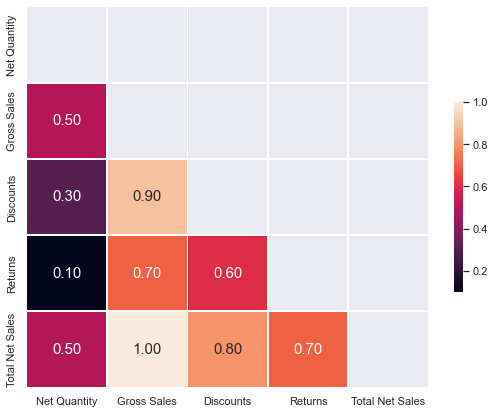

In [25]:
#find correlation betwwen columns
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(9, 7))
with sns.axes_style('white'):
    ax = sns.heatmap(corr.round(1), 
                     linewidths=.4, 
                     mask=mask, 
                     annot=True, 
                     annot_kws={"size": 15}, 
                     fmt=".2f", 
                     cbar_kws={"shrink": .50})